# 🧪 Hipotez Testi Adımları: Veriyle Karar Verme Süreci

## Giriş: İddialar Sayılarla Sınanır

Diyelim ki yeni bir kampanya başladı.  
Satışlar arttı.  
Ama bu artış gerçekten kampanyadan mı kaynaklanıyor?

## 1. 🔍 Adım 1: Hipotezleri Kurmak

### Null Hipotezi (H₀): Fark yoktur.
### Alternatif Hipotez (H₁): Fark vardır.

📌 Örnek:
- H₀: Kampanya sonrası dönüşüm oranı = kampanya öncesi
- H₁: Kampanya sonrası dönüşüm oranı > kampanya öncesi

In [2]:
print("H0: Ortalama = 172 cm")
print("H1: Ortalama ≠ 172 cm")

# ✅ Bu adım, analizin yönünü belirler.

H0: Ortalama = 172 cm
H1: Ortalama ≠ 172 cm


## 2. ⚖️ Adım 2: Anlamlılık Düzeyini Belirlemek

Anlamlılık düzeyi (`α`) → kabul edebileceğimiz maksimum **Tip I hata** oranıdır.

📌 Genellikle `α = 0.05` alınır.  
Yani %5 yanılma payı var.

#### Python Kodu:

In [4]:
alpha = 0.05
print(f"Kabul edilen Tip I hata payı (alfa): {alpha}")

Kabul edilen Tip I hata payı (alfa): 0.05


📌 Alfa düşükse → daha tutucu karar  
Alfa yüksekse → daha açık sonuç

## 3. 📐 Adım 3: Test İstatistiğini Seçmek

Hangi test istatistiği kullanılacak?
Bunu belirleyen şey:

- Örneklem büyüklüğü (`n`)
- Dağılım türü (normal mi, Poisson mu?)
- Değişken türü (nicel mi, nitel mi?)

| Test Türü | Kullanım Durumu |
|----------|----------------|
| **Z-testi** | n ≥ 30, σ biliniyor |
| **T-testi** | n < 30, σ bilinmiyor |
| **Ki-Kare** | Kategorik veri, bağımsızlık testi |
| **ANOVA** | 3+ grup karşılaştırması |

📌 Zaman serisi, oran testi gibi özel durumlarda farklı testler de kullanılır.

## 4. 🧮 Adım 4: Test İstatistiğini Hesaplamak

### Örnek: Erkeklerin boy ortalaması 172 cm mi?

In [5]:
import numpy as np
from scipy.stats import norm

np.random.seed(42)
orneklem = np.random.normal(loc=174, scale=5, size=100)  # örneklem verisi
mu_0 = 172  # H0 hipotezi

ortalama = orneklem.mean()
std = orneklem.std()
n = len(orneklem)

# Z skoru hesaplama
z_skoru = (ortalama - mu_0) / (std / np.sqrt(n))
print(f"Z Skoru: {z_skoru:.2f}")

Z Skoru: 3.28


📌 Bu değer, tablo değeriyle kıyaslanacak.

## 5. 📊 Adım 5: Tablo Değeri ile Karşılaştırma

Standart normal dağılımda:
- `%95 güven düzeyi` için kritik z-değeri = **±1.96**
- Eğer `|Zh| > 1.96` → H₀ reddedilir

#### Python Kodu:

In [6]:
kritik_deger = norm.ppf(1 - alpha/2)
print(f"Tablo değeri (kritik z-skorumuz): ±{kritik_deger:.2f}")

if abs(z_skoru) > kritik_deger:
    print("✅ H₀ reddedildi → Gerçek fark var")
else:
    print("❌ H₀ reddedilemedi → Fark tesadüfi olabilir")

Tablo değeri (kritik z-skorumuz): ±1.96
✅ H₀ reddedildi → Gerçek fark var


📌 Bu adımda karar veriliyor.

📈 Görselleştirme: Zh vs Zt

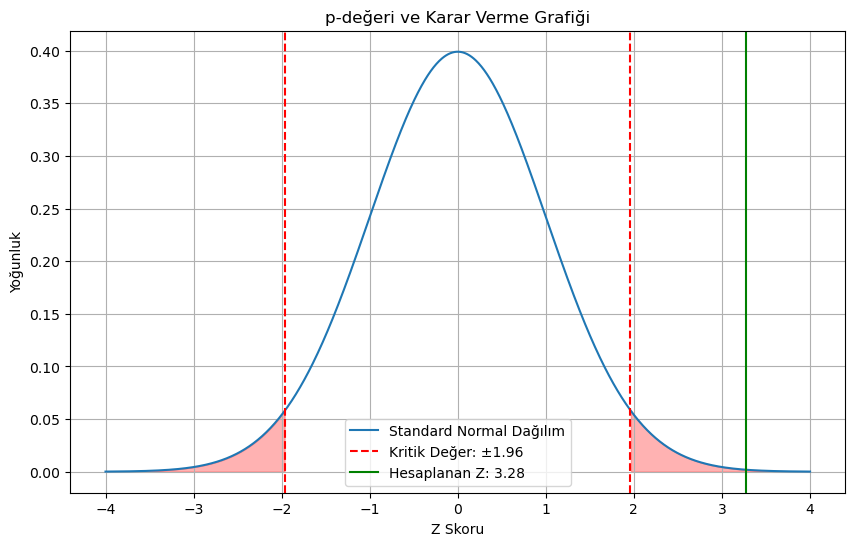

In [8]:
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt

x = np.linspace(-4, 4, 1000)
y = norm.pdf(x)

plt.figure(figsize=(10, 6))
plt.plot(x, y, label="Standard Normal Dağılım")

# Kritik değerler
plt.axvline(kritik_deger, color='red', linestyle='--', label=f'Kritik Değer: ±{kritik_deger:.2f}')
plt.axvline(-kritik_deger, color='red', linestyle='--')

# Hesaplanan Z skoru
plt.axvline(z_skoru, color='green', linestyle='-', label=f'Hesaplanan Z: {z_skoru:.2f}')

# Red bölgesi
plt.fill_between(x, y, where=(x >= kritik_deger), color='red', alpha=0.3)
plt.fill_between(x, y, where=(x <= -kritik_deger), color='red', alpha=0.3)

plt.title("p-değeri ve Karar Verme Grafiği")
plt.xlabel("Z Skoru")
plt.ylabel("Yoğunluk")
plt.grid(True)
plt.legend()
plt.show()


📌 Bu grafikte:
- Yeşil çizgi → hesapladığınız fark
- Kırmızı alan → red bölgesi

Eğer yeşil çizgi kırmızının dışındaysa → H₀ reddedilir.

🛠️ p-değeri ile Aynı Sonuç

In [9]:
p_degeri = 2 * (1 - norm.cdf(abs(z_skoru)))
print(f"p-değeri: {p_degeri:.6f}")

if p_degeri < alpha:
    print("✅ H₀ reddedildi → Fark var")
else:
    print("❌ H₀ reddedilemedi → Fark yok")

p-değeri: 0.001048
✅ H₀ reddedildi → Fark var


📌 Hem Z skoru hem p-değeri aynı sonucu veriyor.

## 📋 Adımları Tekrarlayalım:

| Adım | Açıklama | Python’da Ne Yapıyoruz? |
|------|-----------|-------------------------|
| 1 | H₀ ve H₁ kurulumu | "Fark yok", "Fark var" |
| 2 | α seçimi | Genellikle 0.05 |
| 3 | Test istatistiği seçimi | Z veya T-testi |
| 4 | Test istatistiği hesaplaması | Formülle ya da scipy |
| 5 | Karar verme | p-değeri < α mı? |

📌 Bu adımlar, her istatistiksel test için geçerlidir.

## 📉 Hipotez Testi Türleri ve Hangisinde Ne Kullanılır?

| Test Türü | Veri Türü | Örnek |
|-----------|------------|--------|
| **Z-Testi** | Oran testi, büyük örneklem | Dönüşüm oranı arttı mı? |
| **T-Testi** | Küçük örneklem, sürekli veri | Ürün fiyatı etkisi |
| **Ki-Kare** | Kategorik veri | Cinsiyetle memnuniyet ilişkili mi? |
| **ANOVA** | Üçten fazla grup | Üç farklı ilacın etkisi |

📌 Her test için aynı adımlar geçerli → tek fark **test istatistiği ve dağılımı.**

## 📊 Gerçek Hayatta Uygulamalar

| Senaryo | Test Türü | Açıklama |
|--------|-----------|-----------|
| Yeni tasarımın dönüşüm oranı yükseldi mi? | Z-testi | Oran testi |
| Reklam bütçesi artışı satışları etkiledi mi? | T-testi | Küçük veri |
| Memnuniyet cinsiyete göre değişiyor mu? | Ki-Kare | Kategorik ilişki |
| 3 farklı fiyat stratejisi | ANOVA | Gruplar arası fark |

📌 Tüm bu testlerde hep aynı süreç uygulanır.